In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
from pycaret.regression import *


In [3]:
filepath = r"C:\Users\ana18\OneDrive\Desktop\Python\myvenv\Practice\Projects\ts_forecasting\AirPassengers.csv"
df = pd.read_csv(filepath)
df.columns = ['Date','Number of Passengers']
df['Date'] = pd.to_datetime(df.Date)

print(df.head(10))

        Date  Number of Passengers
0 1949-01-01                   112
1 1949-02-01                   118
2 1949-03-01                   132
3 1949-04-01                   129
4 1949-05-01                   121
5 1949-06-01                   135
6 1949-07-01                   148
7 1949-08-01                   148
8 1949-09-01                   136
9 1949-10-01                   119


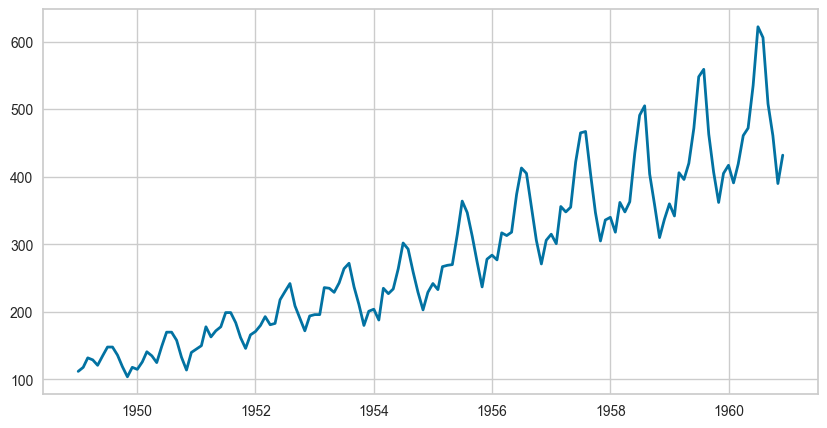

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    fig,ax = plt.subplots(1,1,figsize = (10,5))
    ax.plot(x,y,linewidth = 2)    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

In [5]:
#Introduce 12 month moving average
df['MA12'] = df['Number of Passengers'].rolling(12).mean()
df.head(20)

,Date,Number of Passengers,MA12
0,1949-01-01,112,NaN
1,1949-02-01,118,NaN
2,1949-03-01,132,NaN
3,1949-04-01,129,NaN
4,1949-05-01,121,NaN
5,1949-06-01,135,NaN
6,1949-07-01,148,NaN
7,1949-08-01,148,NaN
8,1949-09-01,136,NaN
9,1949-10-01,119,NaN


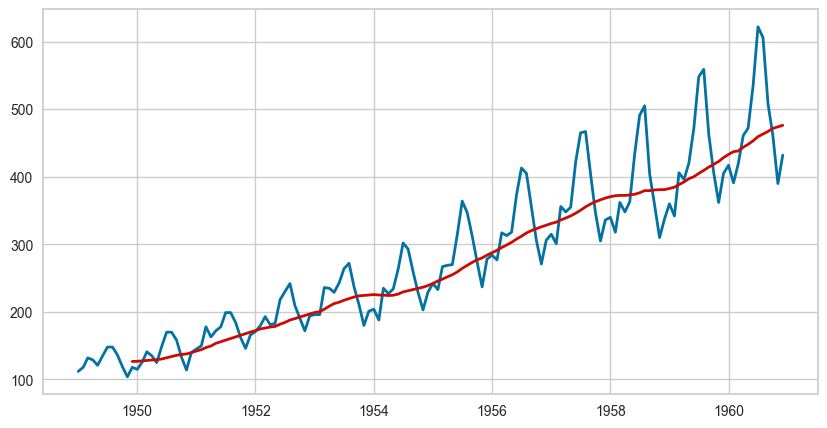

In [6]:
#plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')
#plot_df(df, x=df['Date'], y=df['MA12'], title='Number of US Airline passengers from 1949 to 1960')
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(df['Date'],df['Number of Passengers'],'b',linewidth = 2)
ax.plot(df['Date'],df['MA12'],'r',linewidth = 2)

In [7]:
df['Month'] = [i.month for i in df['Date']]
df['Year'] = [i.year for i in df['Date']]
df['Series'] = np.arange(1,len(df)+1)

In [8]:
#drop non needed columns
df.drop(['Date','MA12'],axis=1,inplace=True)
df=df[['Series','Year','Month','Number of Passengers']]
df.head(3)

,Series,Year,Month,Number of Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132


In [9]:
#Train Test Split
train = df[df['Year'] < 1960]
test = df[df['Year'] >= 1960]

In [10]:
s = setup(data = train, test_data = test, target = 'Number of Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, data_split_shuffle = False , fold_shuffle = False, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Number of Passengers
2,Target type,Regression
3,Original data shape,"(144, 4)"
4,Transformed data shape,"(144, 4)"
5,Transformed train set shape,"(132, 4)"
6,Transformed test set shape,"(12, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,44.3192,3050.6952,53.8852,-0.4522,0.1714,0.1521,0.0233
br,Bayesian Ridge,45.5643,3233.7133,55.6766,-0.6553,0.1765,0.1576,0.0200
lr,Linear Regression,45.7431,3261.7577,55.8899,-0.6723,0.1771,0.1583,0.0300
ridge,Ridge Regression,45.7835,3257.2206,55.8542,-0.6687,0.1770,0.1585,0.0200
lar,Least Angle Regression,45.8053,3260.6009,55.8841,-0.6721,0.1771,0.1586,0.0233
huber,Huber Regressor,46.0420,3308.9723,56.4600,-0.8186,0.1802,0.1618,0.0333
lasso,Lasso Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0233
llar,Lasso Least Angle Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0233
gbr,Gradient Boosting Regressor,52.4896,4355.4048,63.7434,-0.7220,0.2142,0.1618,0.0433
en,Elastic Net,52.5924,3937.1760,61.2301,-1.4778,0.2367,0.1870,0.0233


TypeError: 'OrthogonalMatchingPursuit' object is not iterable

In [14]:
display(best)

OrthogonalMatchingPursuit()

In [ ]:
tuned_best_model = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.8196,2503.0394,50.0304,-1.5293,0.2067,0.1854
1,33.3443,1708.9433,41.3394,0.3109,0.1351,0.1109
2,61.7936,4940.1030,70.2859,-0.1381,0.1724,0.1599
Mean,44.3192,3050.6952,53.8852,-0.4522,0.1714,0.1521
Std,12.4907,1374.7832,12.1276,0.7834,0.0292,0.0309


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
(predict_model(tuned_best_model))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,64.0721,5685.5261,75.4024,-0.0264,0.1544,0.1373


,Series,Year,Month,Number of Passengers,prediction_label
132,133,1960,1,417,469.015654
133,134,1960,2,391,473.451733
134,135,1960,3,419,477.924367
135,136,1960,4,461,482.433814
136,137,1960,5,472,486.980332
137,138,1960,6,535,491.564182
138,139,1960,7,622,496.185626
139,140,1960,8,606,500.844927
140,141,1960,9,508,505.542352
141,142,1960,10,461,510.278166


In [ ]:
predict_model(tuned_best_model,df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,33.2810,2048.6856,45.2624,0.8567,0.1356,0.1126


,Series,Year,Month,Number of Passengers,prediction_label
0,1,1949,1,112,120.962681
1,2,1949,2,118,122.327867
2,3,1949,3,132,123.706393
3,4,1949,4,129,125.098368
4,5,1949,5,121,126.503906
...,...,...,...,...,...
139,140,1960,8,606,500.844927
140,141,1960,9,508,505.542352
141,142,1960,10,461,510.278166
142,143,1960,11,390,515.052638


In [ ]:
predictions = predict_model(tuned_best_model,data=df)
predictions['Date'] = pd.date_range(start='1949-01-01', end = '1960-12-01', freq = 'MS')
predictions.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,33.2810,2048.6856,45.2624,0.8567,0.1356,0.1126


,Series,Year,Month,Number of Passengers,prediction_label,Date
0,1,1949,1,112,120.962681,1949-01-01
1,2,1949,2,118,122.327867,1949-02-01
2,3,1949,3,132,123.706393,1949-03-01
3,4,1949,4,129,125.098368,1949-04-01
4,5,1949,5,121,126.503906,1949-05-01


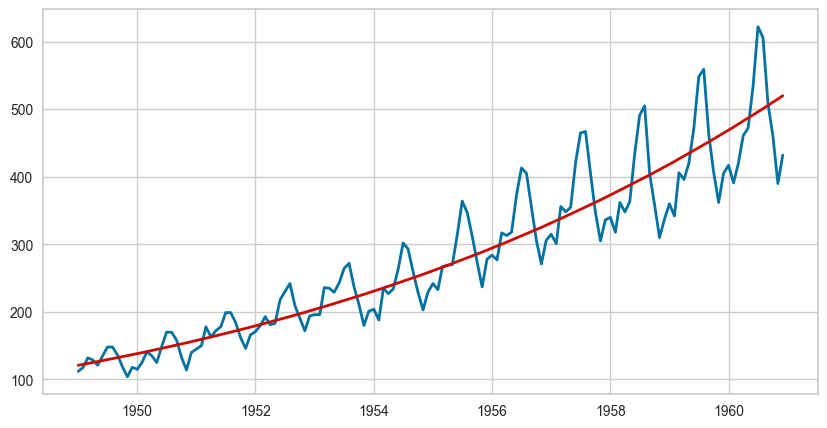

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(predictions['Date'],predictions['Number of Passengers'],'b',linewidth = 2)
ax.plot(predictions['Date'],predictions['prediction_label'],'r',linewidth = 2)